In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
data = pd.read_csv('dog_rates_tweets.csv',  parse_dates=[1])

In [3]:
data['rating'] = pd.to_numeric(data['text'].str.extract(pat = r'(\d+(\.\d+)?)/10')[0])
data = data[data.rating < 25]

In [4]:
def to_timestamp (date):
    return date.timestamp()

In [5]:
data['timestamp'] = data['created_at'].apply(to_timestamp)
fit = linregress(data['timestamp'].values, data['rating'].values)
data['prediction'] = data['timestamp']*fit.slope + fit.intercept

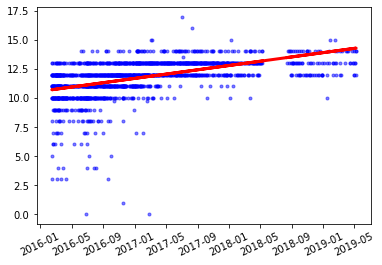

In [7]:
plt.xticks(rotation=25)
plt.plot(data['created_at'].values, data['rating'].values, 'b.', alpha=0.5)
plt.plot(data['created_at'].values, data['prediction'].values, 'r-', linewidth=3)
plt.show()